In [11]:
import numpy as np
import torch
from torchvision import datasets, transforms
import helper
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F
from collections import OrderedDict

In [2]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes. '''
    ps = ps.data.numpy().squeeze()
    
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.set_title('Image')
    ax1.axis('off')
    
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    
    plt.tight_layout()

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5),(0.5))])

In [4]:
trainset = datasets.MNIST('MNIST_data/',download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/',download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [5]:
input_size = 784
hidden_size = [128, 64]
output_size = 10

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(hidden_size[1], output_size)),
    ('softmax', nn.Softmax(dim=1))
]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
print('Before ', model.fc1.weight)

Before  Parameter containing:
tensor([[ 0.0236,  0.0085, -0.0275,  ..., -0.0078, -0.0338,  0.0130],
        [-0.0165, -0.0286, -0.0278,  ...,  0.0245,  0.0214,  0.0085],
        [-0.0220,  0.0235, -0.0060,  ...,  0.0038,  0.0273, -0.0271],
        ...,
        [ 0.0269,  0.0134,  0.0339,  ..., -0.0127, -0.0038,  0.0094],
        [ 0.0122,  0.0088, -0.0014,  ...,  0.0070, -0.0080,  0.0129],
        [ 0.0152,  0.0084, -0.0136,  ..., -0.0112,  0.0051, -0.0108]],
       requires_grad=True)


In [13]:
images, labels = next(iter(trainloader))
images.resize_(64, 784)

optimizer.zero_grad()

#Forward pass
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Graident ', model.fc1.weight.grad)
optimizer.step()

Graident  tensor([[ 6.3456e-04,  6.3456e-04,  6.3456e-04,  ...,  6.3456e-04,
          6.3456e-04,  6.3456e-04],
        [-4.4728e-05, -4.4728e-05, -4.4728e-05,  ..., -4.4728e-05,
         -4.4728e-05, -4.4728e-05],
        [ 1.7438e-05,  1.7438e-05,  1.7438e-05,  ...,  1.7438e-05,
          1.7438e-05,  1.7438e-05],
        ...,
        [-8.3815e-05, -8.3815e-05, -8.3815e-05,  ..., -8.3815e-05,
         -8.3815e-05, -8.3815e-05],
        [ 1.1282e-05,  1.1282e-05,  1.1282e-05,  ...,  1.1282e-05,
          1.1282e-05,  1.1282e-05],
        [ 1.9639e-05,  1.9639e-05,  1.9639e-05,  ...,  1.9639e-05,
          1.9639e-05,  1.9639e-05]])


In [14]:
print('Updated weights -', model.fc1.weight)

Updated weights - Parameter containing:
tensor([[ 0.0236,  0.0085, -0.0275,  ..., -0.0078, -0.0338,  0.0130],
        [-0.0165, -0.0286, -0.0278,  ...,  0.0245,  0.0214,  0.0085],
        [-0.0220,  0.0235, -0.0060,  ...,  0.0038,  0.0273, -0.0271],
        ...,
        [ 0.0269,  0.0134,  0.0339,  ..., -0.0127, -0.0038,  0.0094],
        [ 0.0122,  0.0088, -0.0014,  ...,  0.0070, -0.0080,  0.0129],
        [ 0.0152,  0.0084, -0.0136,  ..., -0.0112,  0.0051, -0.0108]],
       requires_grad=True)


In [7]:
ps = model.forward(images[0])

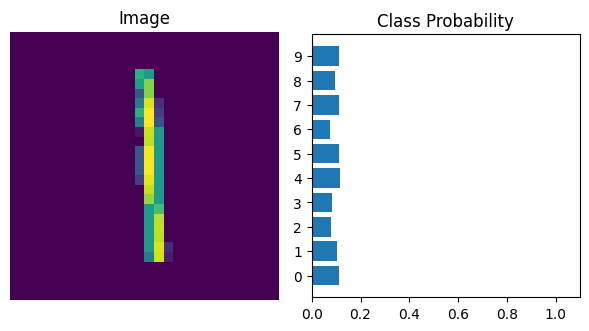

In [8]:
view_classify(images[0].view(1,28,28), ps)

In [9]:
model.fc2

Linear(in_features=128, out_features=64, bias=True)